In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
from scipy.signal import find_peaks, savgol_filter
from scipy.stats import pearsonr

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
domain = pd.read_csv('data/domain.csv')
df = pd.read_csv('data/dataset.csv')
X = df.drop(columns=['HbA1c', 'years'])
y = df['HbA1c']
years = df['years']

X.columns = np.ravel(domain)

In [4]:
df[df['HbA1c'] <= 6.5]

,1,2,3,4,5,6,7,8,9,10,...,7461,7462,7463,7464,7465,7466,7467,7468,HbA1c,years
0,0.218005,0.219062,0.221151,0.223613,0.225833,0.227473,0.228559,0.229367,0.230196,0.231184,...,0.009077,0.009074,0.009070,0.009066,0.009061,0.009055,0.009048,0.009040,5.80,54.0
1,0.235756,0.237171,0.238089,0.237939,0.236417,0.233711,0.230487,0.227615,0.225840,0.225530,...,0.009705,0.009699,0.009691,0.009680,0.009668,0.009657,0.009649,0.009646,5.08,45.0
3,0.274799,0.278454,0.282762,0.286734,0.289707,0.291557,0.292687,0.293748,0.295275,0.297400,...,0.007627,0.007653,0.007674,0.007688,0.007694,0.007692,0.007685,0.007673,4.46,34.0
4,0.223600,0.225310,0.227360,0.229167,0.230353,0.230925,0.231297,0.232071,0.233744,0.236466,...,0.010025,0.010028,0.010034,0.010041,0.010048,0.010051,0.010052,0.010049,5.36,59.0
6,0.283905,0.284516,0.285507,0.286117,0.285742,0.284252,0.282040,0.279801,0.278184,0.277519,...,0.010203,0.010193,0.010185,0.010180,0.010180,0.010184,0.010194,0.010208,5.50,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0.318715,0.313592,0.309274,0.305793,0.303204,0.301713,0.301645,0.303252,0.306504,0.310941,...,0.010810,0.010794,0.010773,0.010748,0.010721,0.010696,0.010675,0.010661,6.50,61.0
435,0.313363,0.314186,0.315543,0.317050,0.318237,0.318869,0.319107,0.319391,0.320173,0.321657,...,0.010471,0.010458,0.010449,0.010443,0.010444,0.010451,0.010464,0.010481,6.00,58.0
436,0.245106,0.247455,0.249869,0.251878,0.253053,0.253250,0.252739,0.252075,0.251839,0.252383,...,0.007608,0.007604,0.007600,0.007597,0.007597,0.007602,0.007614,0.007633,5.50,48.0
439,0.243514,0.244631,0.246306,0.248120,0.249626,0.250567,0.250970,0.251070,0.251109,0.251166,...,0.009158,0.009146,0.009125,0.009097,0.009069,0.009047,0.009036,0.009037,6.50,47.0


In [5]:
X = df.drop(columns=['HbA1c', 'years'])
y = df['HbA1c']
X.columns = np.ravel(domain)
X

,400.1635,400.6456,401.1277,401.6098,402.0919,402.5741,403.0562,403.5383,404.0204,404.5026,...,3995.8490,3996.3310,3996.8130,3997.2950,3997.7770,3998.2590,3998.7410,3999.2240,3999.7060,4000.1880
0,0.218005,0.219062,0.221151,0.223613,0.225833,0.227473,0.228559,0.229367,0.230196,0.231184,...,0.009078,0.009078,0.009077,0.009074,0.009070,0.009066,0.009061,0.009055,0.009048,0.009040
1,0.235756,0.237171,0.238089,0.237939,0.236417,0.233711,0.230487,0.227615,0.225840,0.225530,...,0.009709,0.009708,0.009705,0.009699,0.009691,0.009680,0.009668,0.009657,0.009649,0.009646
2,0.261524,0.264529,0.267711,0.270232,0.271406,0.271031,0.269475,0.267460,0.265697,0.264599,...,0.007980,0.007985,0.007995,0.008008,0.008024,0.008040,0.008058,0.008075,0.008092,0.008107
3,0.274799,0.278454,0.282762,0.286734,0.289707,0.291557,0.292687,0.293748,0.295275,0.297400,...,0.007575,0.007600,0.007627,0.007653,0.007674,0.007688,0.007694,0.007692,0.007685,0.007673
4,0.223600,0.225310,0.227360,0.229167,0.230353,0.230925,0.231297,0.232071,0.233744,0.236466,...,0.010037,0.010029,0.010025,0.010028,0.010034,0.010041,0.010048,0.010051,0.010052,0.010049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.253261,0.254469,0.255437,0.255796,0.255311,0.254114,0.252725,0.251827,0.251964,0.253304,...,0.012096,0.012106,0.012107,0.012100,0.012086,0.012068,0.012050,0.012036,0.012028,0.012027
448,0.352318,0.352299,0.353075,0.353827,0.353893,0.353158,0.352134,0.351675,0.352509,0.354873,...,0.008853,0.008796,0.008742,0.008701,0.008674,0.008662,0.008658,0.008657,0.008654,0.008645
449,0.224357,0.223553,0.223732,0.224696,0.226143,0.227831,0.229672,0.231706,0.233981,0.236420,...,0.006502,0.006461,0.006417,0.006378,0.006347,0.006329,0.006321,0.006323,0.006330,0.006340
451,0.332913,0.333179,0.334629,0.336291,0.337391,0.337680,0.337502,0.337541,0.338393,0.340228,...,0.011321,0.011328,0.011328,0.011320,0.011305,0.011282,0.011256,0.011230,0.011207,0.011190


<Axes: >

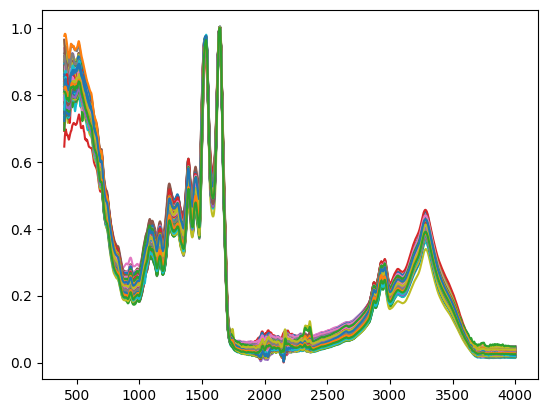

In [6]:
X = X.apply(lambda row: row / max(row.iloc[2000:]), axis=1)
X = X.T.apply(lambda col: savgol_filter(col, window_length=50, polyorder=2, deriv=0)).T
X.T.plot(legend=False)

In [7]:
#2340 2573

<Axes: ylabel='Count'>

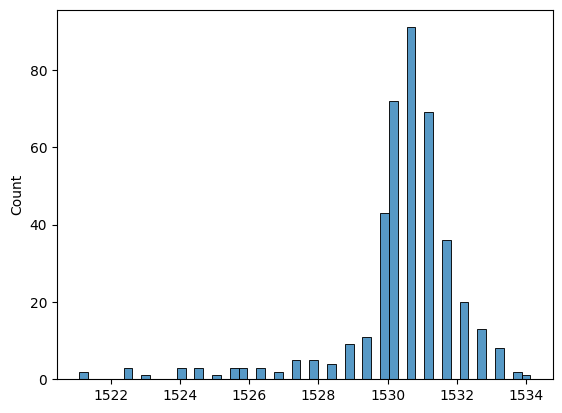

In [8]:
#np.max(X.iloc[:, 2300:2400], axis=1)
amide_b_wn = X.iloc[:, 2300:2400].idxmax(axis=1)
amide_b = X.iloc[:, 2300:2400].max(axis=1)
sns.histplot(amide_b_wn)

<Axes: ylabel='Count'>

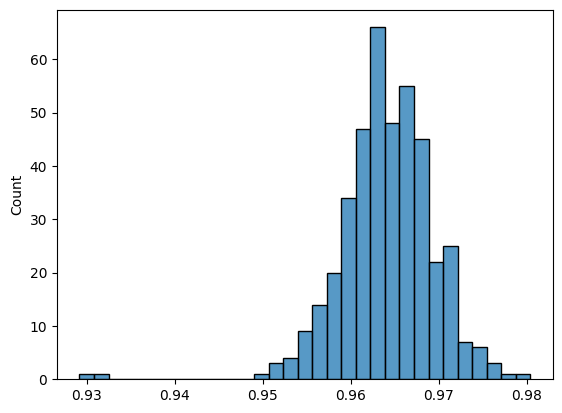

In [9]:
sns.histplot(amide_b)

<Axes: ylabel='Count'>

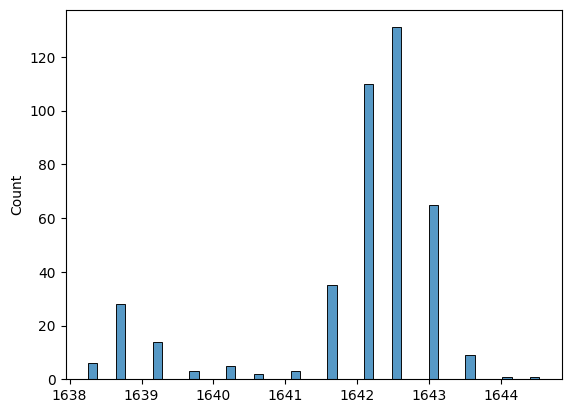

In [10]:
#np.max(X.iloc[:, 2500:2600], axis=1)
amide_a_wn = X.iloc[:, 2500:2600].idxmax(axis=1)
amide_a = X.iloc[:, 2500:2600].max(axis=1)
sns.histplot(amide_a_wn)

In [11]:
amide_ratio = amide_a / amide_b
amide_ratio

0      1.038612
1      1.039932
2      1.038593
3      1.031513
4      1.034676
         ...   
446    1.037358
448    1.033058
449    1.021953
451    1.046481
454    1.037754
Length: 413, dtype: float64

Text(3.5, 1.06, '$R = 0.313$\n$p < 0.00001$\n$y = 0.00114x + 1.03069$')

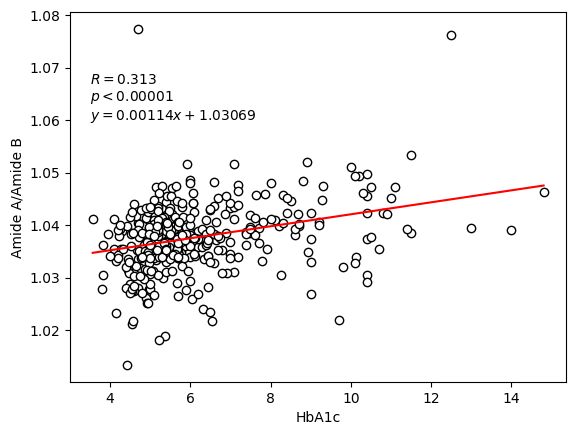

In [12]:
r, p_val = pearsonr(y, amide_ratio)

model = LinearRegression()
model.fit(y.to_numpy().reshape(-1, 1), amide_ratio)

x_range = np.linspace(min(y), max(y), 100)
predicted = model.predict(x_range.reshape(-1, 1))

if p_val < 0.00001:
    text = f"$R = {r:.3f}$\n$p < 0.00001$\n$y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}$"
else:
    text = f"$R = {r:.3f}$\n$p = {p_val:.5f}$\n$y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}$"
    
plt.scatter(y, amide_ratio, facecolor='w', edgecolor='k')
plt.plot(x_range, predicted, color='r', linewidth=1.5)
plt.xlabel("HbA1c")
plt.ylabel("Amide A/Amide B")
plt.text(3.5, 1.06, text)

In [13]:
def corr_plot(X, y):
    r, p_val = pearsonr(X, y)
    
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    
    x_range = np.linspace(min(X), max(X))
    predicted = model.predict(x_range.reshape(-1, 1))
    
    if p_val < 0.00001:
        text = f"$R = {r:.3f}$\n$p < 0.00001$\n$y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}$"
    else:
        text = f"$R = {r:.3f}$\n$p = {p_val:.5f}$\n$y = {model.coef_[0]:.5f}x + {model.intercept_:.5f}$"
        
    plt.scatter(X, y, facecolor='w', edgecolor='k')
    plt.plot(x_range, predicted, color='r', linewidth=1.5)
    plt.xlabel("$y_1$")
    plt.ylabel("$y_2$")

    x_offset = (max(X) - min(X)) * 0.02
    y_offset = (max(y) - min(y)) * 0.02
    text_x = min(X) + x_offset
    text_y = max(y) - 15 * y_offset
    
    plt.text(text_x, text_y, text)

In [14]:
#corr_plot(y.to_numpy(), amide_ratio)

In [15]:
#corr_plot(years.to_numpy(), amide_ratio)

(1000.0, 1700.0)

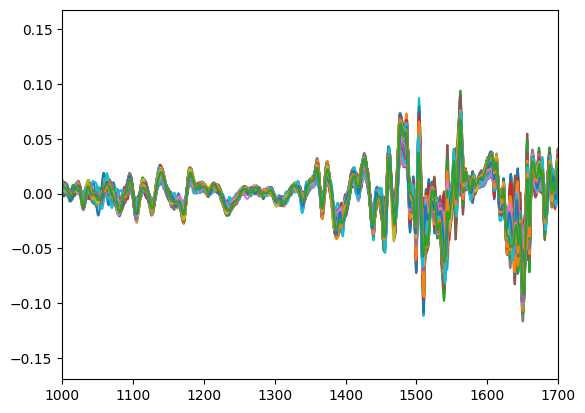

In [16]:
X = df.drop(columns=['HbA1c', 'years'])
y = df['HbA1c']
X.columns = np.ravel(domain)
#X = X.apply(lambda row: row / max(row.iloc[2000:]), axis=1)
X_deriv = X.T.apply(lambda col: savgol_filter(col, window_length=25, polyorder=2, deriv=2)).T
X_deriv = X_deriv.apply(lambda row: row / np.linalg.norm(row), axis=1)
X_deriv.T.plot(legend=False)
plt.xlim([1000, 1700])

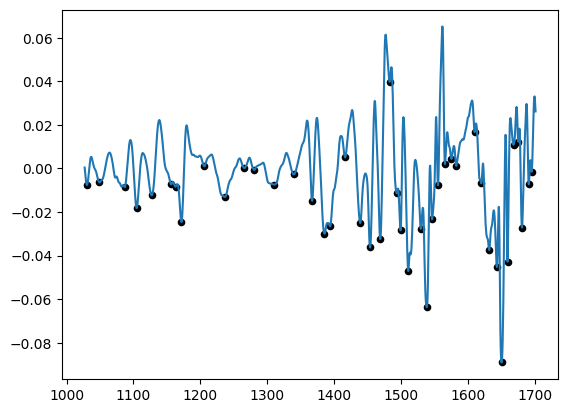

In [17]:
sample = X_deriv.iloc[0, 1300:2700]
#select_peaks = sample.copy()
#select_peaks[select_peaks > 0] = 0
plt.plot(sample)
#plt.xlim([1000, 1700])

peaks, _ = find_peaks(-sample, prominence=0.001)
plt.scatter(sample.index[peaks], sample.iloc[peaks], s=20, color='k')

In [18]:
from lmfit.models import ExponentialModel, VoigtModel

def create_params(array: pd.Series, peaks):
    params = {}

    for i, peak in enumerate(peaks):
        params.update({
            f"v{i+1}amplitude": dict(value=1, vary=True),
            f"v{i+1}center": dict(value=array.index[peak], vary=True),
            f"v{i+1}sigma": dict(value=1, min=0, vary=True),
            f"v{i+1}gamma": dict(value=1, min=0, vary=True)
        })
    
    return params

def fit_voigt(array: pd.Series, peaks):

    def create_params(array: pd.Series, peaks):
        params = {}
    
        for i, peak in enumerate(peaks):
            params.update({
                f"v{i+1}amplitude": dict(value=1, min=0, vary=True),
                f"v{i+1}center": dict(value=array.index[peak], vary=True),
                f"v{i+1}sigma": dict(value=1, min=0, vary=True),
                f"v{i+1}gamma": dict(value=1, min=0, vary=True)
            })
        
        return params
    
    params_dict = create_params(array, peaks)
    
    composite_model = None
    model_names = []
    
    for i, peak in enumerate(peaks):
        model_name = f"v{i+1}"
        voigt_model = VoigtModel(prefix=model_name)
        if composite_model is None:
            composite_model = voigt_model
        else:
            composite_model += voigt_model
        model_names.append(model_name)

    params = composite_model.make_params(**params_dict)
    result = composite_model.fit(array, params, x=array.index)

    plt.figure(figsize=(8, 5))
    plt.plot(sample, color='k', linewidth=1, label='true values')
    plt.scatter(sample.index[peaks], sample.iloc[peaks], alpha=1, color='r')

    x_range = np.arange(min(array.index), max(array.index))
    comp = result.eval_components(x=x_range)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=sample.index, y=sample.to_numpy(), mode='lines', name='Sample'))
    fig.add_trace(go.Scatter(x=sample.index, y=result.best_fit, mode='lines', line=dict(color='black'), name='Best Fit'))
    fig.update_layout(title='Voigt fit', 
                  xaxis_title='wavenumber', 
                  yaxis_title='Absorbance', 
                  height=650, 
                  width=950
                 )
    
    print("SS: ", np.sum((result.best_fit - sample.to_numpy())**2))
    
    for key, values in comp.items():
        key = key + 'center'
        name = str(round(result.params[key].value, 2))
        plt.plot(x_range, values, linestyle='--')
        fig.add_trace(go.Scatter(x=x_range, y=values, mode='lines', line=dict(dash='dash'), name=name))
    
    plt.plot(sample.index, result.best_fit, label='best fit')
    
    #plt.plot(sample.index, result.init_fit, label='initial fit', linestyle='--')
    
    plt.legend()
    #plt.savefig("voigt_fit_1.png")

    fitted_params = result.params

    # for param_name, param in fitted_params.items():
    #     print(param_name, param.value)
    fig.show()
    
    return fig

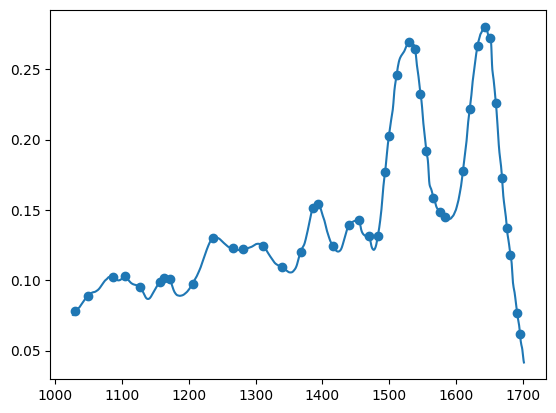

In [19]:
sample = X.iloc[0, 1300:2700]
plt.plot(sample)
plt.scatter(sample.index[peaks], sample.iloc[peaks])

In [20]:
#peaks = np.array([1055, 1266])

SS:  5.687220130785249e-05


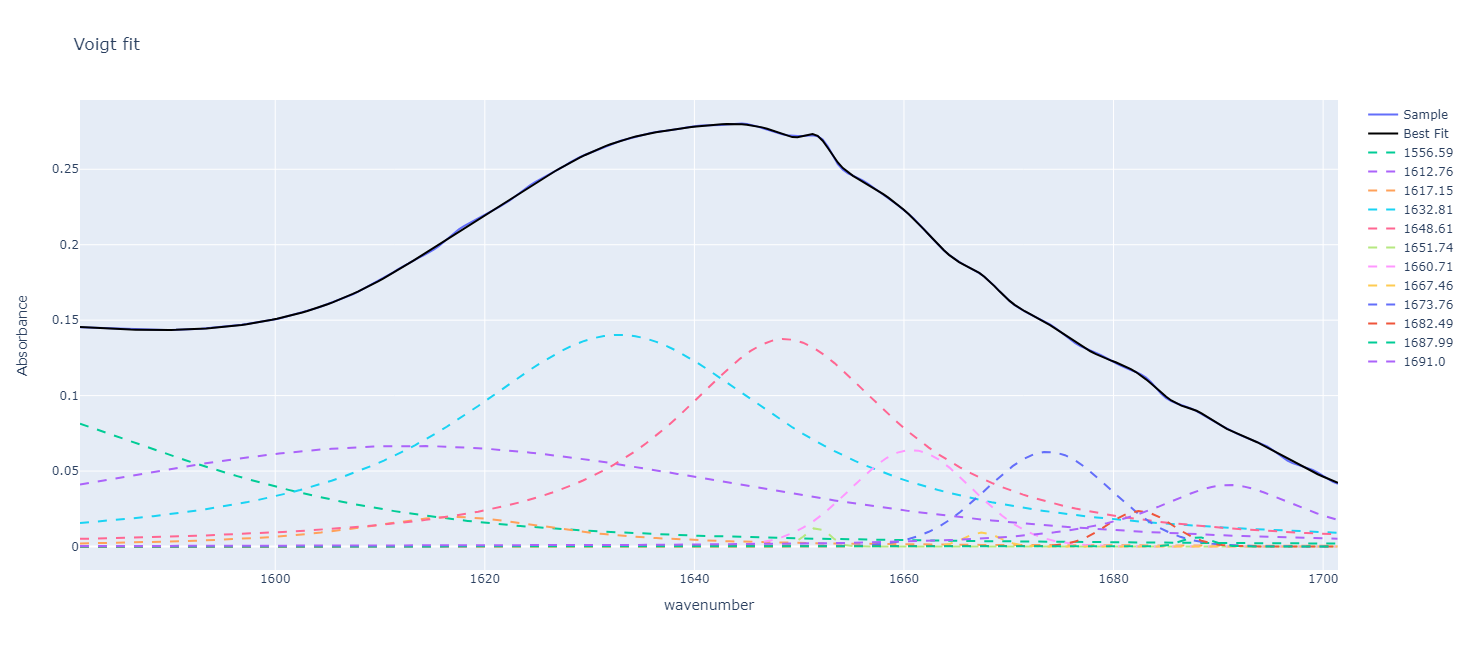

CPU times: total: 3min 2s
Wall time: 3min 3s


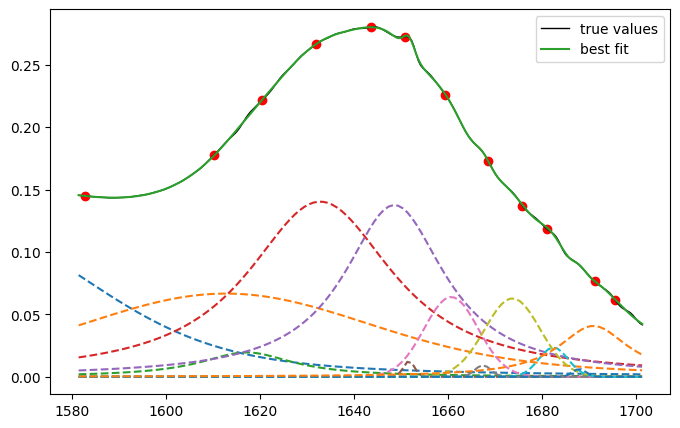

In [27]:
%%time
fig = fit_voigt(sample, peaks)
fig.write_html("voigt_fit_cpu.html")

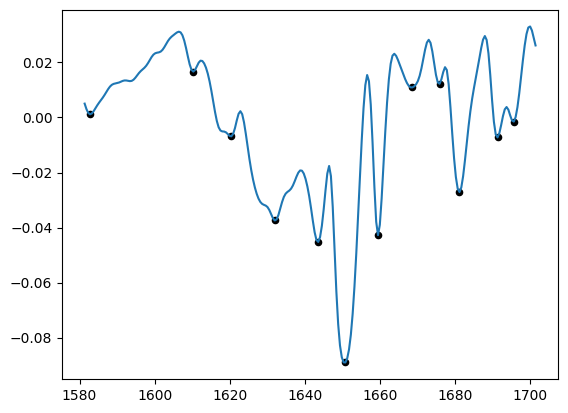

In [22]:
sample = X_deriv.iloc[0, 2450:2700]

peaks, _ = find_peaks(-sample, prominence=0.001)

plt.scatter(sample.index[peaks], sample.iloc[peaks], s=20, color='k')
plt.plot(sample)

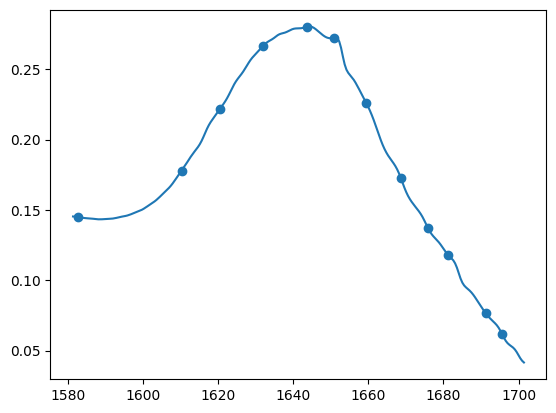

In [23]:
sample = X.iloc[0, 2450:2700]
plt.plot(sample)
plt.scatter(sample.index[peaks], sample.iloc[peaks])

In [24]:
X = df.drop(columns=['years'])
X['cat'] = X['HbA1c'].apply(lambda x: 'D' if x >= 6.5 else 'H')

In [25]:
X_db = X.drop(columns='HbA1c').groupby('cat').mean()
X_db

,1,2,3,4,5,6,7,8,9,10,...,7459,7460,7461,7462,7463,7464,7465,7466,7467,7468
cat,,,,,,,,,,,,,,,,,,,,,
D,0.284161,0.285121,0.286765,0.288451,0.289601,0.289994,0.289850,0.289674,0.289953,0.290892,...,0.010713,0.010703,0.010693,0.010684,0.010676,0.010669,0.010665,0.010662,0.010661,0.010661
H,0.264731,0.265776,0.267449,0.269026,0.269946,0.270063,0.269689,0.269385,0.269640,0.270625,...,0.009502,0.009502,0.009502,0.009501,0.009499,0.009497,0.009494,0.009491,0.009491,0.009492


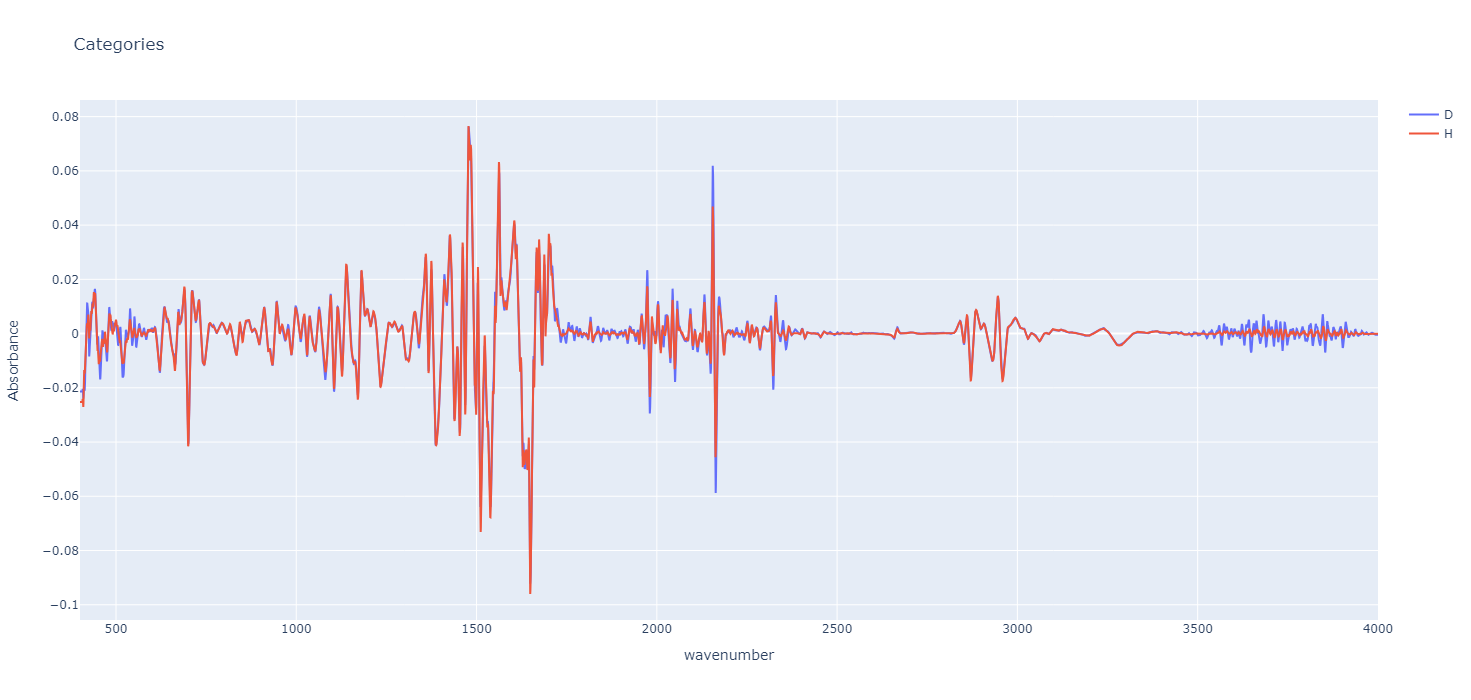

In [26]:
X_db = X_db.T.apply(lambda col: savgol_filter(col, window_length=30, polyorder=2, deriv=2)).T
X_db = X_db.apply(lambda row: row / np.linalg.norm(row), axis=1)
#X_db = X_db.apply(lambda row: row / max(row), axis=1)

fig = go.Figure()

for index, row in X_db.iterrows():
    fig.add_trace(go.Scatter(x=np.ravel(domain), y=row.to_numpy(), name=index))


fig.update_layout(title='Categories', 
                  xaxis_title='wavenumber', 
                  yaxis_title='Absorbance', 
                  height=700, 
                  width=1100
                 )